In [73]:
!pip install matplotlib deap

In [74]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import math

In [75]:
num_locations =25
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 6

In [76]:
print("Locations:", locations)
print("Depot:", depot)
print("Number of Vehicles:", num_vehicles)

Locations: [(71, 78), (26, 99), (14, 88), (98, 94), (39, 41), (48, 89), (54, 19), (41, 23), (67, 22), (81, 45), (13, 80), (48, 38), (95, 48), (92, 42), (28, 82), (0, 11), (78, 24), (68, 38), (86, 32), (3, 39), (57, 90), (92, 57), (90, 45), (11, 46), (21, 91)]
Depot: (50, 50)
Number of Vehicles: 6


In [77]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [78]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [79]:
def calculate_distance(location1, location2):
    x1, y1 = location1
    x2, y2 = location2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [80]:
def evalVRP(individual):
    total_distance = 0
    distances = []
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = 0
        current_location = depot
        for location in vehicle_route[1:]:
            distance = calculate_distance(current_location, location)
            vehicle_distance += distance
            current_location = location

        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

In [81]:
toolbox.register("evaluate",evalVRP)

In [82]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [83]:
import matplotlib.pyplot as plt
def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min   
0  	300   	777.885	13.468
1  	221   	752.695	13.3205
2  	234   	739.207	16.9068
3  	229   	735.343	11.0761
4  	222   	727.717	17.2674
5  	218   	721.393	8.92297
6  	236   	721.384	13.0235
7  	239   	721.114	14.4969
8  	242   	715.212	14.6085
9  	226   	708.721	12.983 
10 	230   	706.064	11.7365
11 	237   	705.866	13.5347
12 	217   	694.758	15.8597
13 	234   	688.158	10.1537
14 	222   	690.223	17.5014
15 	226   	684.48 	16.7721
16 	218   	664.539	13.7016
17 	232   	637.762	17.2731
18 	232   	602.8  	18.2808
19 	223   	570.103	20.7195
20 	222   	546.923	26.4076
21 	224   	530.222	12.2517
22 	228   	521.101	17.4486
23 	228   	522.58 	23.8249
24 	253   	512.904	13.5774
25 	213   	507.997	21.2937
26 	211   	503.491	24.5913
27 	233   	499.366	23.9724
28 	217   	495.01 	25.2236
29 	245   	494.356	24.5136
30 	221   	484.003	24.7351
Best Individual: [0, 21, 16, 14, 1, 4, 9, 22, 8, 24, 20, 23, 12, 17, 6, 10, 3, 15, 13, 11, 7, 2, 5, 19, 18]
Best Fitness (total distance, 

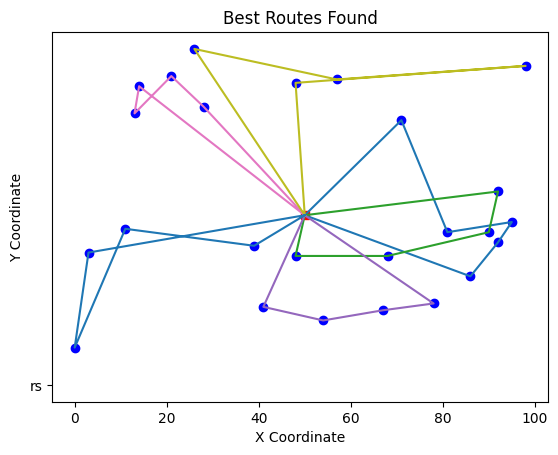

Statistics:


In [84]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    return pop, stats, hof
if __name__ == "__main__":
    pop, stats, hof = main()
    best_individual = hof[0]
    print("Best Individual:", best_individual)
    best_fitness = toolbox.evaluate(best_individual)
    print("Best Fitness (total distance, standard deviation):", best_fitness)
    plot_routes(best_individual, title="Best Routes Found")
    print("Statistics:")
    print(stats)